Часть 1 :)))))

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/katakitaeva/Desktop/DPO/Grib/homeworks/HW02/S02-hw-dataset.csv")

print("~~~~~~head")
print(df.head())
print("~~~~~~info")
print(df.info())
print("~~~~~~describe")
print(df.describe())
print("~~~~~~доля пропусков")
print(df.isna().mean())
print("~~~~~~доля строк-дубликатов")
print(df.duplicated().mean())
dup_count = df.duplicated().sum()
if dup_count > 0:
    print("~~~~~~Дубликат:")
    print(df[df.duplicated(keep=False)].head())

unrealistic_age = (df['age'] > 120) | (df['age'] <= 0)
if unrealistic_age.any():
    count = unrealistic_age.sum()
    print(f"Возраст > 120 лет: {count} записей")
    print(df[unrealistic_age][['age']].head())
else:
    print("Возрастные данные корректны (нет значений > 120 лет или <= 0)")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns # проверка числовых значений
for col in numeric_cols: # проверка на наличие отрицательных значений
    if df[col].min() < 0:
        neg_count = (df[col] < 0).sum()
        print(f"{col}: {neg_count} отрицательных значений")

~~~~~~head
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
~~~~~~info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
~~~~~~describe
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1

*В столбце age 4.9% пропусков (2 из 41 строки)
    Остальные столбцы без пропусков

2.4% дублирующих строк (1 полный дубликат из 41)
    Найдены строки 9 и 40 с одинаковыми данными
В столбце purchases 1 отрицательное значение - невозможное количество покупок*

In [25]:
# Группировка по странам с разными агрегатами
group = df.groupby('country').agg( 
    # это получается, что мы к каждому столбцу отдельную функцию применяем 
    # (количество пользователей;
    # средний возраст;
    # сумма покупок;
    # средний доход)
    пользователей=('user_id', 'count'),
    средний_возраст=('age', 'mean'),
    сумма_покупок=('purchases', 'sum'),
    средний_доход=('revenue', 'mean')
).round(1) # одна цифра после запятой
print("~~~~~~Группировка по странам:")
print(group)

~~~~~~Группировка по странам:
         пользователей  средний_возраст  сумма_покупок  средний_доход
country                                                              
CN                   2             24.0              9         1054.0
DE                   6             34.6             39         1445.5
FR                  12             46.2             51          675.9
RU                  13             30.1             62          790.1
US                   8             36.7             37          557.4


In [39]:
print("~~~~~~Частоты стран:")
print(df['country'].value_counts())

print("\n~~~~~~Частоты стран в процентах:")
print((df['country'].value_counts()*100/ len(df)).round(1))

~~~~~~Частоты стран:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

~~~~~~Частоты стран в процентах:
country
RU    31.7
FR    29.3
US    19.5
DE    14.6
CN     4.9
Name: count, dtype: float64


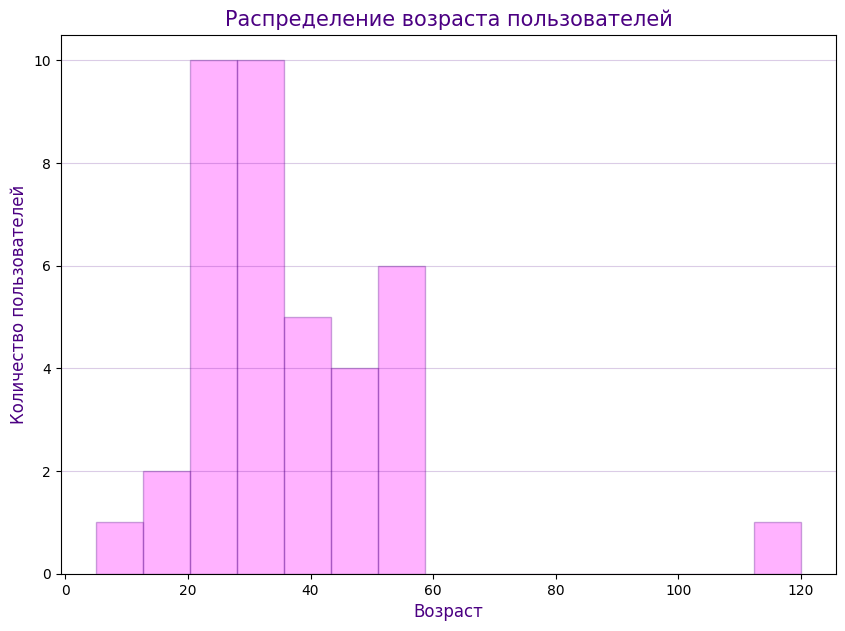

In [73]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'].dropna(), bins=15, color='#FF00FF', edgecolor='#4B0082', alpha=0.3)
plt.title('Распределение возраста пользователей', fontsize=15, color='#4B0082')
plt.xlabel('Возраст', fontsize=12, color='#4B0082')
plt.ylabel('Количество пользователей', fontsize=12, color='#4B0082')
plt.grid(axis='y', alpha=0.2, color='#4B0082')
plt.show()

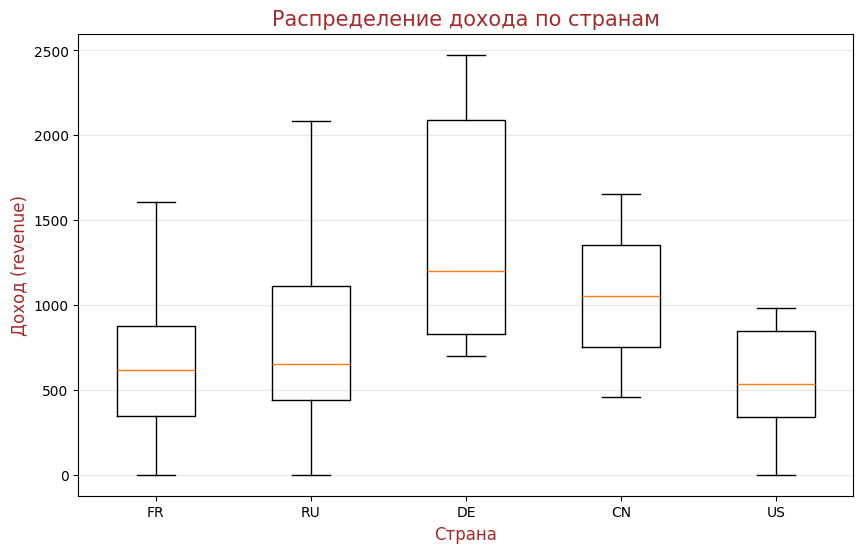

In [75]:
plt.figure(figsize=(10, 6), colozr ='#A52A2A')

countries = df['country'].unique()
data = [df[df['country'] == c]['revenue'] for c in countries]

plt.boxplot(data, tick_labels=countries)
plt.title('Распределение дохода по странам', fontsize=15, color ='#A52A2A')
plt.xlabel('Страна', fontsize=12, color ='#A52A2A')
plt.ylabel('Доход (revenue)', fontsize=12, color ='#A52A2A')
plt.grid(axis='y', alpha=0.3)
plt.show()

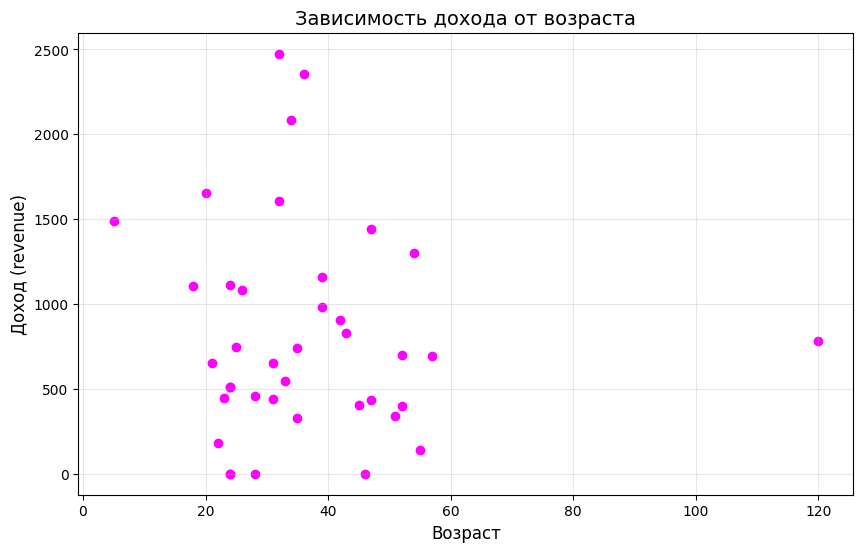

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['revenue'], color='#FF00FF')
plt.title('Зависимость дохода от возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('figures/figure.png')
plt.show()